In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)

# Group analysis

First, let's take a look at the data.

In [2]:
scores = pd.read_csv('cleaned_data/scores.csv')
scores

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
7,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
8,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
9,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


It will be difficult to actually compared indicators such as `work`, `marriage`, `madrs` between the two groups because the control group essentially does not have any data on them. But we can still see the distribution of the data for the condition group.

In [3]:
conditions = scores.loc[0:19, :]
conditions['gender'] = np.where(conditions['gender']==1, 'F', 'M')
conditions['age'] = pd.Categorical(conditions['age'], categories=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69'], ordered=True)
conditions.head()

C:\Users\Duong\AppData\Local\Temp\ipykernel_22404\4136415618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions['gender'] = np.where(conditions['gender']==1, 'F', 'M')
C:\Users\Duong\AppData\Local\Temp\ipykernel_22404\4136415618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions['age'] = pd.Categorical(conditions['age'], categories=['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69'], ordered=True)


,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,M,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,M,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,F,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,M,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,M,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


First, lets see all the distribution of all the variables aside from depression indicators

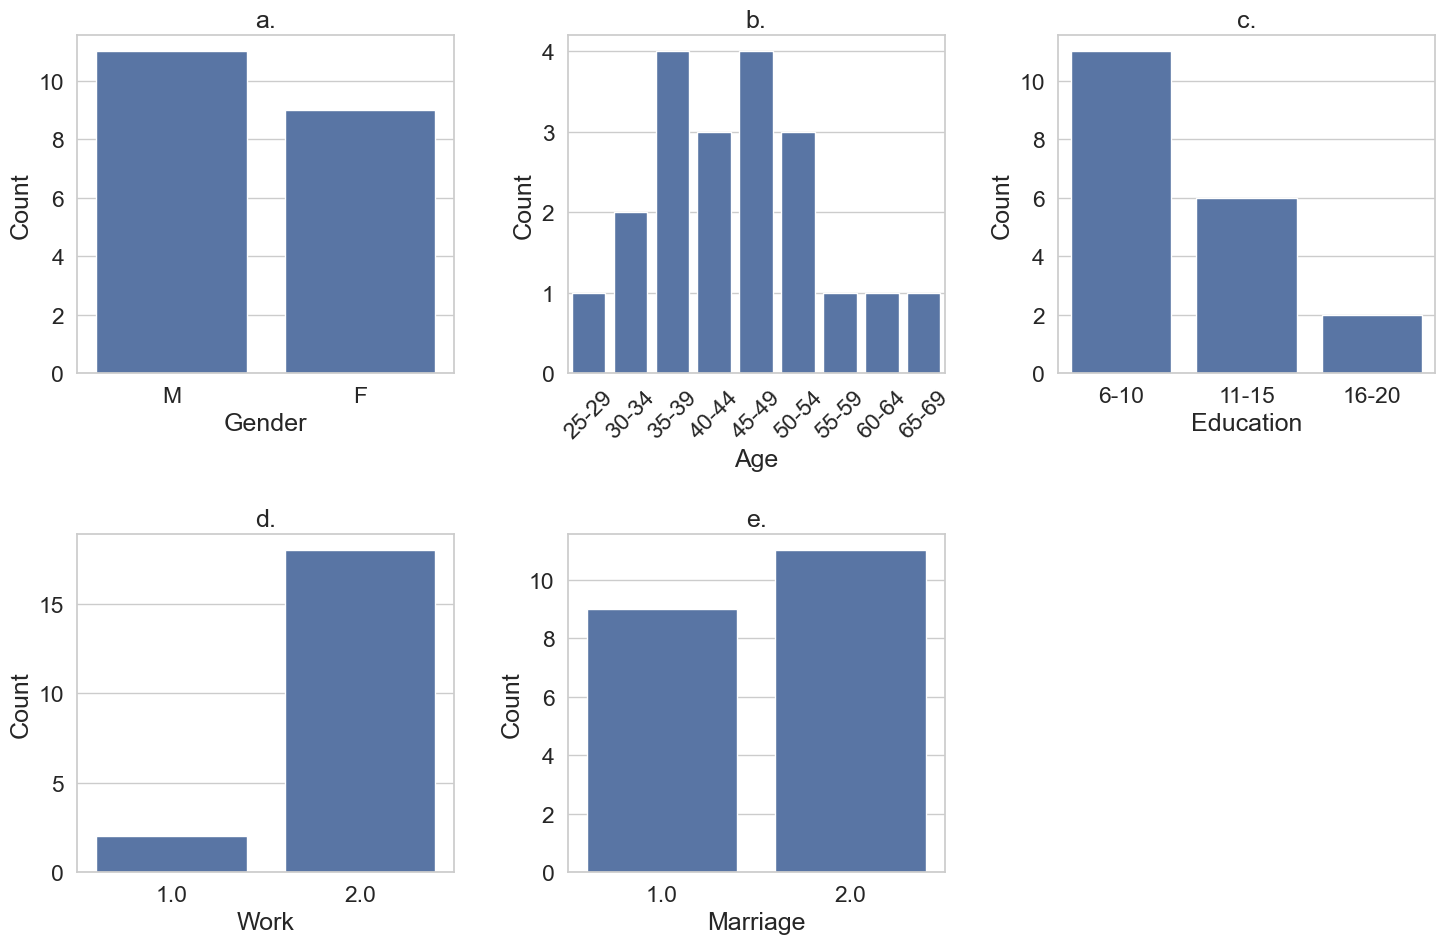

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.delaxes(ax = axes[1,2])

sns.countplot(ax=axes[0, 0], x='gender', data=conditions)
sns.countplot(ax=axes[0, 1], x='age', data=conditions)
sns.countplot(ax=axes[0, 2], x='edu', data=conditions)
sns.countplot(ax=axes[1, 0], x='work', data=conditions)
sns.countplot(ax=axes[1, 1], x='marriage', data=conditions)

axes[0, 0].set(
    xlabel='Gender',
    ylabel='Count',
    title='a.')

axes[0, 1].set(
    xlabel='Age',
    ylabel='Count',
    title='b.')

axes[0, 2].set(
    xlabel='Education',
    ylabel='Count',
    title='c.')

axes[1, 0].set(
    xlabel='Work',
    ylabel='Count',
    title='d.')

axes[1, 1].set(
    xlabel='Marriage',
    ylabel='Count',
    title='e.')

axes[0, 1].tick_params(axis='x', rotation=45)
fig.tight_layout(pad=1.5)

Next, let see the depression indicator stuff

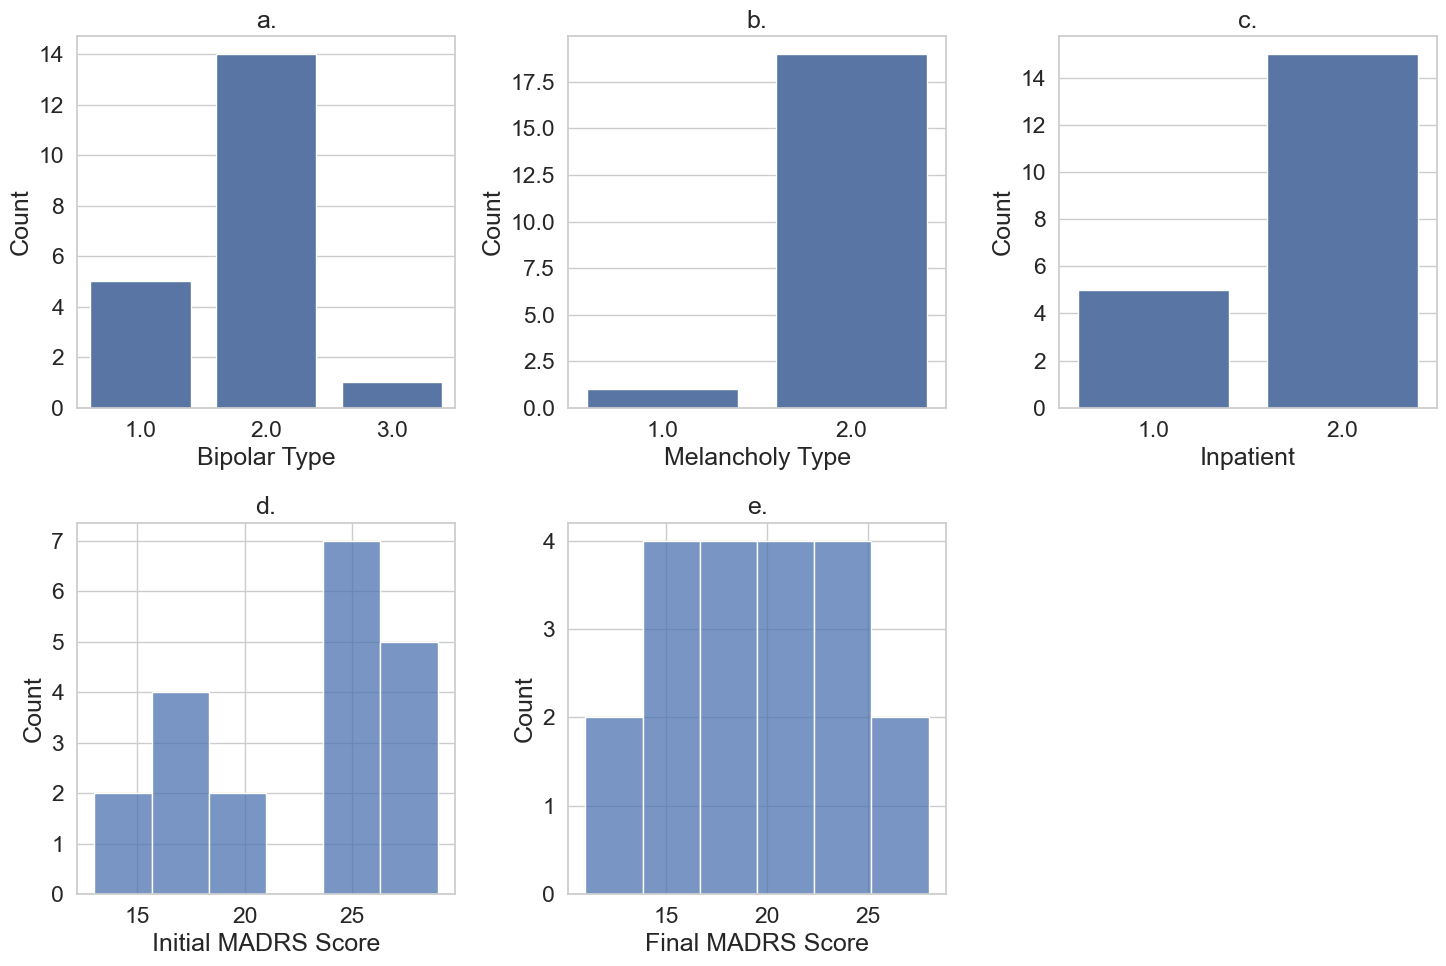

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.delaxes(ax = axes[1,2])

sns.countplot(ax=axes[0, 0], x='afftype', data=conditions)
sns.countplot(ax=axes[0, 1], x='melanch', data=conditions)
sns.countplot(ax=axes[0, 2], x='inpatient', data=conditions)
sns.histplot(ax=axes[1, 0], x='madrs1', data=conditions)
sns.histplot(ax=axes[1, 1], x='madrs2', data=conditions)

axes[0, 0].set(
    xlabel='Bipolar Type',
    ylabel='Count',
    title='a.')

axes[0, 1].set(
    xlabel='Melancholy Type',
    ylabel='Count',
    title='b.')

axes[0, 2].set(
    xlabel='Inpatient',
    ylabel='Count',
    title='c.')

axes[1, 0].set(
    xlabel='Initial MADRS Score',
    ylabel='Count',
    title='d.')

axes[1, 1].set(
    xlabel='Final MADRS Score',
    ylabel='Count',
    title='e.')

fig.tight_layout()

As we will use the bipolar type, melancholy type, inpatient, and initial MADRS scores to predict the final MADRS score later. It made sense to pplot the violin plot of them with the final MADRS score. The reason for using this kind of plot is that the other indicators (aside from initial MADRS score), can be treated as categorical data. Thus, violin plot would make more sense than correlation plot. The only exception is madrs1, where the plot will be scatterplot.

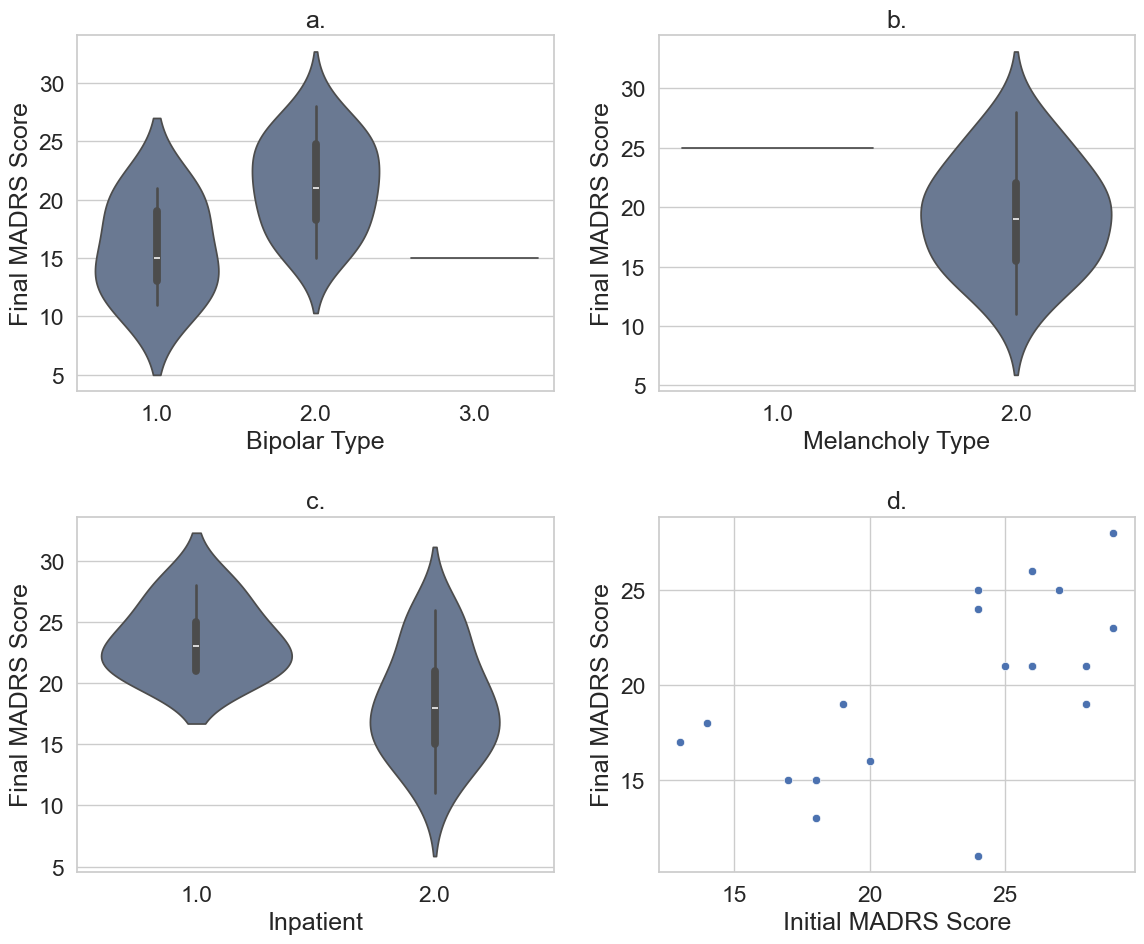

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

sns.violinplot(x='afftype', y='madrs2', ax=axes[0, 0], data=conditions, saturation=.4)
sns.violinplot(x='melanch', y='madrs2', ax=axes[0, 1], data=conditions, saturation=.4)
sns.violinplot(x='inpatient', y='madrs2', ax=axes[0, 2], data=conditions, saturation=.4)
sns.violinplot(x='work', y='madrs2', ax=axes[1, 0], data=conditions, saturation=.4)
sns.violinplot(x='marriage', y='madrs2', ax=axes[1, 1], data=conditions, saturation=.4)
sns.scatterplot(x='madrs1', y='madrs2', ax=axes[1, 2], data=conditions)

axes[0, 0].set(
    xlabel='Bipolar Type',
    ylabel='Final MADRS Score',
    title='a.')

axes[0, 1].set(
    xlabel='Melancholy Type',
    ylabel='Final MADRS Score',
    title='b.')


axes[0, 2].set(
    xlabel='Inpatient',
    ylabel='Final MADRS Score',
    title='c.')

axes[1, 0].set(
    xlabel='Work',
    ylabel='Final MADRS Score',
    title='d.')

axes[1, 1].set(
    xlabel='Marriage',
    ylabel='Final MADRS Score',
    title='e.')

axes[1, 2].set(
    xlabel='Initial MADRS Score',
    ylabel='Final MADRS Score',
    title='f.')


fig.tight_layout(pad=1.5)